# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6+ syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [171]:
# Cell type : CodeWrite
#Calculting Prior Prob.
def Prior1(Y_train):
    sum = 0
    for i in range(len(Y_train)):
        if Y_train[i] == 1 :
            sum += 1
    a = sum/len(Y_train)
    return a
#mean for positive targate
def m_p(X_train, Y_train):
    mean_p = np.empty(((len(X_train[0])),1))
    for i in range(len(X_train[0])):
        sum_ = 0
        count = 0
        for j in range(len(X_train)):
            if(Y_train[j] == 1):
                sum_ += X_train[j][i]
                count+=1
        mean_p[i] = sum_/count
    return mean_p
#mean for negative targate
def m_n(X_train, Y_train):
    mean_n = np.empty(((len(X_train[0])),1))
    for i in range(len(X_train[0])):
        sum_ = 0
        count = 0
        for j in range(len(X_train)):
            if(Y_train[j] == -1):
                sum_ += X_train[j][i]
                count+=1
        mean_n[i] = sum_/count
    return mean_n
#covariance matrix for positive targate
def cov_p(X_train, Y_train):
    mean_p = m_p(X_train, Y_train)
    count  = 0
    covariance_p = np.zeros((len(X_train[0]), len(X_train[0])))  
    for i in range(len(X_train)):
        if Y_train[i] == 1:
            a = (X_train[i]) - mean_p.T
            b = a.T
            count +=1
            covariance_p = covariance_p + np.matmul( b, a)
    return covariance_p/count
#covariance matrix for negative targate
def cov_n(X_train, Y_train):
    mean_n = m_n(X_train, Y_train)
    count  = 0
    covariance_n = np.zeros((len(X_train[0]) , len(X_train[0])))   
    for i in range(len(X_train)):
        if Y_train[i] == -1:
            a = X_train[i] - mean_n.T
            b = a.T
            count +=1
            covariance_n = covariance_n + np.matmul(b, a)
    return covariance_n/count
#shared covariance matrix
def covariance1(X_train, Y_train):
    covariance_p = cov_p(X_train, Y_train)
    covariance_n = cov_n(X_train, Y_train)
    n1 = 0
    n2 = 0
    for i in range(len(Y_train)):
        if Y_train[i] == 1:
            n1 = n1 + 1
        if Y_train[i] == -1:
            n2 = n2 + 1
    return (n1*covariance_p + n2*covariance_n)/(n1 + n2)
#Calculting Prob
def prob(p, mean, variance, X_test):
    a = X_test - mean.T
    b = a.T
    expo = (np.exp(-0.5 * np.matmul((np.matmul(a, (np.linalg.inv(variance)))),b)))*p
    return expo/np.sqrt(np.linalg.det(variance))
    
def Bayes1a(X_train, Y_train, X_test):
    pr = Prior1(Y_train)
    me_1 = m_p(X_train, Y_train)
    me_0 = m_n(X_train, Y_train)
    Y_test = np.zeros(len(X_test))
    for i in range(len(X_test)):
        prob_p = prob(pr, me_1, np.identity(len(X_train[0])), X_test[i])
        prob_n = prob(1-pr, me_0, np.identity(len(X_train[0])), X_test[i])
        if prob_p > prob_n:
            Y_test[i] = 1
        else:
            Y_test[i] = -1
    return Y_test
   

    
def Bayes1b(X_train, Y_train, X_test):
    pr = Prior1(Y_train)
    me_1 = m_p(X_train, Y_train)
    me_0 = m_n(X_train, Y_train)
    ce_1 = covariance1(X_train, Y_train)
    Y_test = np.zeros(len(X_test))
    for i in range(len(X_test)):
        prob_p = prob(pr, me_1, ce_1, X_test[i])
        prob_n = prob(1-pr, me_0, ce_1, X_test[i])
        if prob_p > prob_n:
            Y_test[i] = 1
        else:
            Y_test[i] = -1
    return Y_test

def Bayes1c(X_train, Y_train, X_test):
    pr = Prior1(Y_train)
    me_1 = m_p(X_train, Y_train)
    me_0 = m_n(X_train, Y_train)
    ce_1 = cov_p(X_train, Y_train)
    ce_0 = cov_n(X_train, Y_train)
    Y_test = np.zeros(len(X_test))
    for i in range(len(X_test)):
        prob_p = prob(pr, me_1, ce_1, X_test[i])
        prob_n = prob(1-pr, me_0, ce_0, X_test[i])
        if prob_p > prob_n:
            Y_test[i] = 1
        else:
            Y_test[i] = -1
    return Y_test
   

    
    




In [201]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)
print(Y_pred_test_1a)
print(Y_pred_test_1b)
print(Y_pred_test_1c)


[ 1. -1.  1. ... -1. -1. -1.]
[ 1. -1.  1. ... -1. -1. -1.]
[ 1. -1.  1. ... -1. -1. -1.]


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


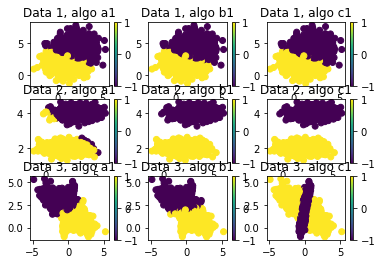

In [205]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
# from numpy import load
## DataSet1

dataset1_1 = np.load('dataset1_1.npz')
X_train1_1 = dataset1_1['arr_0']
Y_train1_1 = dataset1_1['arr_1']
X_test1_1 = dataset1_1['arr_2']
Y_test1_1 = dataset1_1['arr_3']
Y_pred_test_1a1_1 = Bayes1a(X_train1_1, Y_train1_1, X_test1_1)
plt.subplot(3,3,1)
plt.scatter(X_test1_1[:,0],X_test1_1[:,1], c = Y_pred_test_1a1_1)
plt.title("Data 1, algo a1")
plt.colorbar()

Y_pred_test_1b1_1 = Bayes1b(X_train1_1, Y_train1_1, X_test1_1)
plt.subplot(3,3,2)
plt.scatter(X_test1_1[:,0],X_test1_1[:,1], c = Y_pred_test_1b1_1)
plt.title("Data 1, algo b1")
plt.colorbar()

Y_pred_test_1c1_1 = Bayes1c(X_train1_1, Y_train1_1, X_test1_1)
plt.subplot(3,3,3)
plt.scatter(X_test1_1[:,0],X_test1_1[:,1], c = Y_pred_test_1c1_1)
plt.title("Data 1, algo c1")
plt.colorbar()
## DataSet2
dataset1_2 = np.load('dataset1_2.npz')
X_train1_2 = dataset1_2['arr_0']
Y_train1_2 = dataset1_2['arr_1']
X_test1_2 = dataset1_2['arr_2']
Y_test1_2 = dataset1_2['arr_3']
Y_pred_test_1a1_2 = Bayes1a(X_train1_2, Y_train1_2, X_test1_2)
plt.subplot(3,3,4)
plt.scatter(X_test1_2[:,0],X_test1_2[:,1], c = Y_pred_test_1a1_2)
plt.title("Data 2, algo a1")
plt.colorbar()

Y_pred_test_1b1_2 = Bayes1b(X_train1_2, Y_train1_2, X_test1_2)
plt.subplot(3,3,5)
plt.scatter(X_test1_2[:,0],X_test1_2[:,1], c = Y_pred_test_1b1_2)
plt.title("Data 2, algo b1")
plt.colorbar()

Y_pred_test_1c1_2 = Bayes1c(X_train1_2, Y_train1_2, X_test1_2)
plt.subplot(3,3,6)
plt.scatter(X_test1_2[:,0],X_test1_2[:,1], c = Y_pred_test_1c1_2)
plt.title("Data 2, algo c1")
plt.colorbar()
## DataSet3
dataset1_3 = np.load('dataset1_3.npz')
X_train1_3 = dataset1_3['arr_0']
Y_train1_3 = dataset1_3['arr_1']
X_test1_3 = dataset1_3['arr_2']
Y_test1_3 = dataset1_3['arr_3']
Y_pred_test_1a1_3 = Bayes1a(X_train1_3, Y_train1_3, X_test1_3)
plt.subplot(3,3,7)
plt.scatter(X_test1_3[:,0],X_test1_3[:,1], c = Y_pred_test_1a1_3)
plt.title("Data 3, algo a1")
plt.colorbar()

Y_pred_test_1b1_3 = Bayes1b(X_train1_3, Y_train1_3, X_test1_3)
plt.subplot(3,3,8)
plt.scatter(X_test1_3[:,0],X_test1_3[:,1], c = Y_pred_test_1b1_3)
plt.title("Data 3, algo b1")
plt.colorbar()

Y_pred_test_1c1_3 = Bayes1c(X_train1_3, Y_train1_3, X_test1_3)
plt.subplot(3,3,9)
plt.scatter(X_test1_3[:,0],X_test1_3[:,1], c = Y_pred_test_1c1_3)
plt.title("Data 3, algo c1")
plt.colorbar()
plt.show()

  



    

|Error||a||b||c|
|----||----||----||----|
|1||0.126||0.1245||0.1245|
|2||0.0085||0.0||0.0|
|3||0.497||0.495||0.13|









** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [157]:
# Cell type : CodeWrite
# Fill in functions in this cell
l = np.array([[0, 1, 2, 3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
def Prior(Y_train, x):
    sum = 0
    for i in range(len(Y_train)):
        if Y_train[i] == x :
            sum += 1
    a = sum/len(Y_train)
    return a
def mean(X_train, Y_train, x):
    mean = np.empty(((len(X_train[0])),1))
    for i in range(len(X_train[0])):
        sum_ = 0
        count = 0
        for j in range(len(X_train)):
            if(Y_train[j] == x):
                sum_ += X_train[j][i]
                count+=1
        mean[i] = sum_/count
    return mean
def cov(X_train, Y_train, x):
    m = mean(X_train, Y_train, x)
    count = 0
    covariance = np.zeros((len(X_train[0]), len(X_train[0])))  
    for i in range(len(X_train)):
        if Y_train[i] == x:
            a = (X_train[i]) - m.T
#             b = a.T
            count += 1
            covariance = covariance + np.matmul(a.T, a)
    return covariance/count
def covariance(X_train, Y_train):
    n1 = 0
    n2 = 0
    n3 = 0
    n4 = 0
    for i in range(len(Y_train)):
        if Y_train[i] == 1:
            n1 = n1 + 1
        if Y_train[i] == 2:
            n2 = n2 + 1
        if Y_train[i] == 3:
            n3 = n3 + 1
        if Y_train[i] == 4:
            n4 = n4 + 1
    return (n1*cov(X_train, Y_train, 1) + n2*cov(X_train, Y_train, 2) + n3*cov(X_train, Y_train, 3) + n4*cov(X_train, Y_train, 4))/(n1 + n2 + n3 + n4)
def prob(p, mean, variance, X_test):
    a = X_test - mean.T
    b = a.T
    expo = (np.exp(-0.5 * np.matmul((np.matmul(a, (np.linalg.inv(variance)))),b)))*p
    return expo/np.sqrt(np.linalg.det(variance))

def Bayes2a(X_train, Y_train, X_test):
    pr = np.zeros((4))
    me = np.zeros((4,len(X_train[0]),1))
    for i in range(0,4):
        pr[i] = Prior(Y_train, i+1)
        me[i] = mean(X_train, Y_train, i+1)
    Y_test = np.ones(len(X_test))
    for j in range(len(X_test)):
        probarry = np.zeros((4,1))
        for i in range(0,4):
            probarry[i][0] = prob(pr[i], me[i], np.identity(len(X_train[0])), X_test[j])
        max =  np.dot(probarry.T ,l[0])[0]
        for i in range(1,4):
            if max >  np.dot(probarry.T ,l[i])[0]:
                max = np.dot(probarry.T ,l[i])[0]
                Y_test[j] = i+1
    return Y_test
    
def Bayes2b(X_train, Y_train, X_test):
    pr = np.zeros((4))
    me = np.zeros((4,len(X_train[0]),1))
    ce = covariance(X_train, Y_train)
    for i in range(0,4):
        pr[i] = Prior(Y_train, i+1)
        me[i] = mean(X_train, Y_train, i+1)
    Y_test = np.ones(len(X_test))
    for j in range(len(X_test)):
        probarry = np.zeros((4,1))
        for i in range(0,4):
            probarry[i][0] = prob(pr[i], me[i], ce, X_test[j])
        max =  np.dot(probarry.T ,l[0])[0]
        for i in range(1,4):
            if max >  np.dot(probarry.T ,l[i])[0]:
                max = np.dot(probarry.T ,l[i])[0]
                Y_test[j] = i+1
    return Y_test
    

def Bayes2c(X_train, Y_train, X_test):
    pr = np.zeros((4))
    me = np.zeros((4,len(X_train[0]),1))
    ce = np.zeros((4,len(X_train[0]), len(X_train[0])))
    for i in range(0,4):
        pr[i] = Prior(Y_train, i+1)
        me[i] = mean(X_train, Y_train, i+1)
        ce[i] = cov(X_train, Y_train, i+1)
    Y_test = np.ones(len(X_test))
    for j in range(len(X_test)):
        probarry = np.zeros((4,1))
        for i in range(0,4):
            probarry[i][0] = prob(pr[i], me[i], ce[i], X_test[j])
        max =  np.dot(probarry.T ,l[0])[0]
        for i in range(1,4):
            if max >  np.dot(probarry.T ,l[i])[0]:
                max = np.dot(probarry.T ,l[i])[0]
                Y_test[j] = i+1
    return Y_test
 

    
    


    
    


In [203]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)
print(Y_pred_test_2a)
print(Y_pred_test_2b)
print(Y_pred_test_2c)


[2. 1. 1. ... 2. 4. 3.]
[2. 1. 1. ... 2. 4. 3.]
[2. 1. 1. ... 2. 4. 3.]


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


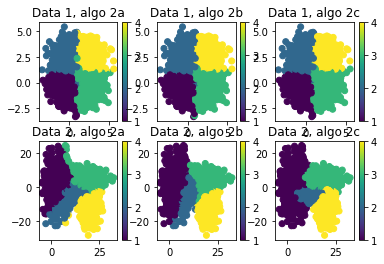

In [206]:
dataset2_1 = np.load('dataset2_1.npz')
X_train2_1 = dataset2_1['arr_0']
Y_train2_1 = dataset2_1['arr_1']
X_test2_1 = dataset2_1['arr_2']
Y_test2_1 = dataset2_1['arr_3']
Y_pred_test_2a2_1 = Bayes2a(X_train2_1, Y_train2_1, X_test2_1)
plt.subplot(2,3,1)
plt.scatter(X_test2_1[:,0],X_test2_1[:,1], c = Y_pred_test_2a2_1)
plt.title("Data 1, algo 2a")
plt.colorbar()
Y_pred_test_2b2_1 = Bayes2b(X_train2_1, Y_train2_1, X_test2_1)
plt.subplot(2,3,2)
plt.scatter(X_test2_1[:,0],X_test2_1[:,1], c = Y_pred_test_2b2_1)
plt.title("Data 1, algo 2b")
plt.colorbar()
Y_pred_test_2c2_1 = Bayes2c(X_train2_1, Y_train2_1, X_test2_1)
plt.subplot(2,3,3)
plt.scatter(X_test2_1[:,0],X_test2_1[:,1], c = Y_pred_test_2c2_1)
plt.title("Data 1, algo 2c")
plt.colorbar()
dataset2_2 = np.load('dataset2_2.npz')
X_train2_2 = dataset2_2['arr_0']
Y_train2_2 = dataset2_2['arr_1']
X_test2_2 = dataset2_2['arr_2']
Y_test2_2 = dataset2_2['arr_3']
Y_pred_test_2a2_2 = Bayes2a(X_train2_2, Y_train2_2, X_test2_2)
plt.subplot(2,3,4)
plt.scatter(X_test2_2[:,0],X_test2_2[:,1], c = Y_pred_test_2a2_2)
plt.title("Data 2, algo 2a")
plt.colorbar()
Y_pred_test_2b2_2 = Bayes2b(X_train2_2, Y_train2_2, X_test2_2)
plt.subplot(2,3,5)
plt.scatter(X_test2_2[:,0],X_test2_2[:,1], c = Y_pred_test_2b2_2)
plt.title("Data 2, algo 2b")
plt.colorbar()
Y_pred_test_2c2_2 = Bayes2c(X_train2_2, Y_train2_2, X_test2_2)
plt.subplot(2,3,6)
plt.scatter(X_test2_2[:,0],X_test2_2[:,1], c = Y_pred_test_2c2_2)
plt.title("Data 2, algo 2c")
plt.colorbar()
plt.show()



**ConfusionMatrix** </br>
For dataset1 </br>


|2a||||||||
|--||--||--||--||
|633|| 219 ||136||  12|
|97|| 738 || 62 ||103|
|86 || 49 ||770 || 95|
|15 ||136 ||194|| 655|

|2b||||||||
|--||--||--||--||
|633||218|| 137||  12|
|95 ||743  ||60 ||102|
|84 || 49|| 773 || 94|
|16 ||137|| 196|| 651|

|2c||||||||
|--||--||--||--||
|634|| 217 ||138 || 11|
|99 || 742  ||61  ||98|
|87 || 47|| 772  ||94|
|15 ||134 ||201 ||65|

For dataset2 </br>

|2a||||||||
|--||--||--||--||
|830 ||150 || 18  || 2|
|93 ||784 || 46 || 77|
|30 || 61 ||905 || 4 |||
|40 || 23||  78|| 899|

|2b||||||||
|--||--||--||--||
|891|| 106 ||  3 ||  0|
|119|| 691|| 124 || 66|
|23|| 106|| 864  || 7|
|0  || 5 ||102|| 893|

|2c||||||||
|--||--||--||--||
|901 || 80 || 19 ||  0|
|64 ||824||  46 || 66|
|19 || 31 ||936 || 14|
|0 || 36||  48|| 916|

|ExpextedLoss||2a||2b||2c|
|--||--||--||--|
|Dataset1||0.42975||0.429||0.42775|
|Dataset2||0.1835||0.1895||0.14075|






**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




Degree= 1 lambda= 1e-07
Bias = 0.08371200645206338
Variance = 0.034214205659320034
MSE = 0.04949780035353566
Degree= 1 lambda= 1e-05
Bias = 0.08457209276073462
Variance = 0.035030197002986076
MSE = 0.049541851423887194
Degree= 1 lambda= 0.001
Bias = 0.08529953448177226
Variance = 0.03566156750616083
MSE = 0.0496335230187704
Degree= 1 lambda= 0.1
Bias = 0.08318120719075484
Variance = 0.03226942520170974
MSE = 0.05050759111807037
Degree= 1 lambda= 10.0
Bias = 0.09252837645162196
Variance = 0.013555047210174925
MSE = 0.0624236437082343
Degree= 1 lambda= 1000.0
Bias = 0.31628214671317617
Variance = 1.1838665650319613e-05
MSE = 0.31519336486900484
Degree= 2 lambda= 1e-07
Bias = 0.0851657630941057
Variance = 0.05545083248937851
MSE = 0.029714928813108513
Degree= 2 lambda= 1e-05
Bias = 0.08555539175213397
Variance = 0.056220829491354166
MSE = 0.029334371779402263
Degree= 2 lambda= 0.001
Bias = 0.08517733941657946
Variance = 0.05552001206554845
MSE = 0.02963816210981941
Degree= 2 lambda= 0.1
B

C:\Users\admin\AppData\Local\Temp\ipykernel_6480\2620399596.py:89: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Degree= 8 lambda= 0.001
Bias = 0.08494752140509125
Variance = 0.08352430557787759
MSE = 0.00032193622764651404
Degree= 8 lambda= 0.1
Bias = 0.0861486116355328
Variance = 0.07272175507859407
MSE = 0.00547895359061457
Degree= 8 lambda= 10.0
Bias = 0.09144353925466188
Variance = 0.01848439634762501
MSE = 0.0501831690535231
Degree= 8 lambda= 1000.0
Bias = 0.30606788970526777
Variance = 7.07076219799793e-05
MSE = 0.3058130689343872
Degree= 16 lambda= 1e-07
Bias = 0.08345391285336082
Variance = 0.08345299392112118
MSE = 4.340797493301901e-08
Degree= 16 lambda= 1e-05
Bias = 0.08551916942984691
Variance = 0.08547456863616125
MSE = 5.300325589910416e-06
Degree= 16 lambda= 0.001
Bias = 0.08653420551886506
Variance = 0.08540492168697922
MSE = 0.00023894560218407814
Degree= 16 lambda= 0.1
Bias = 0.08479315841520521
Variance = 0.07184228537075957
MSE = 0.0047363005376525385
Degree= 16 lambda= 10.0
Bias = 0.08984965529668278
Variance = 0.018172723675594686
MSE = 0.047239895465925864
Degree= 16 lambd

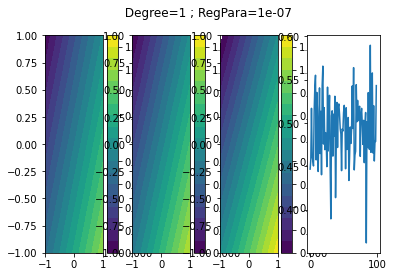

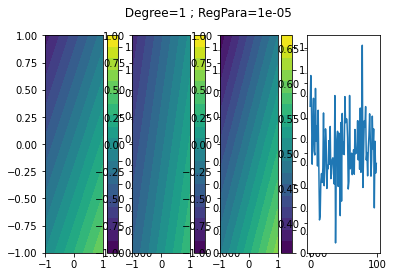

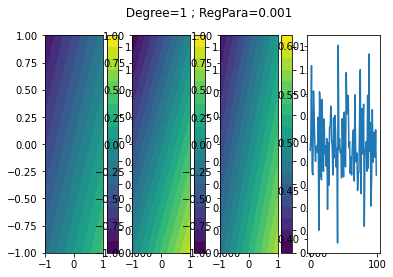

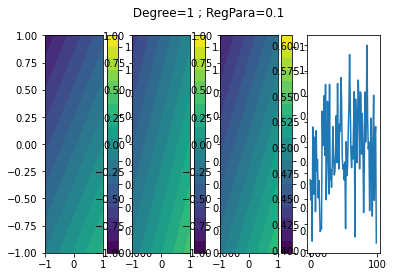

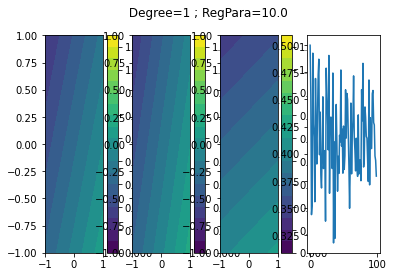

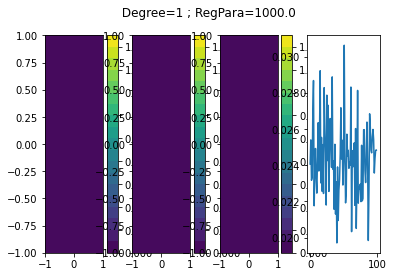

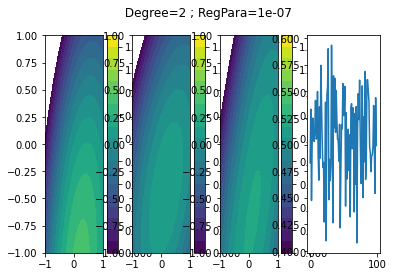

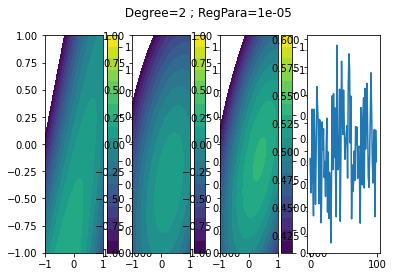

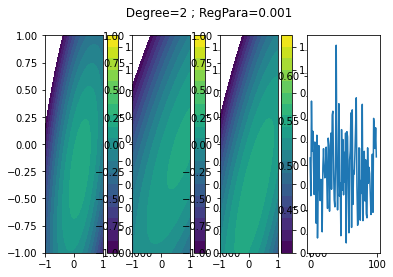

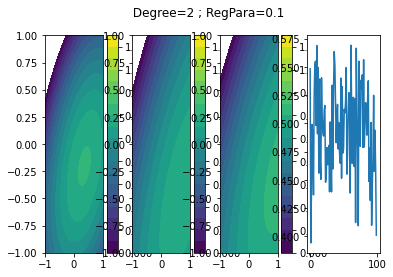

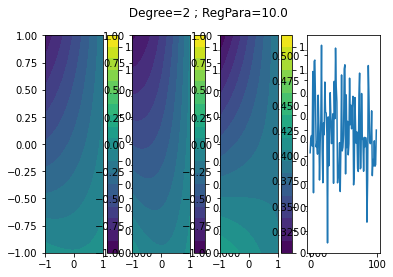

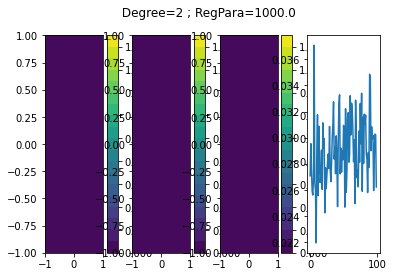

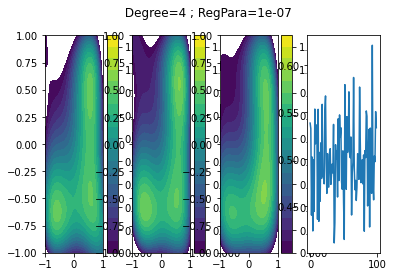

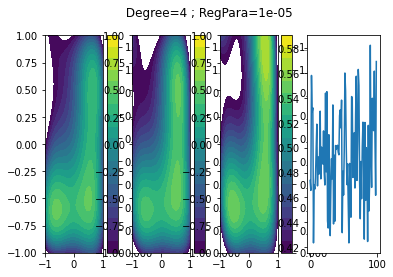

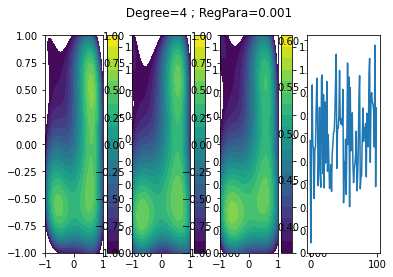

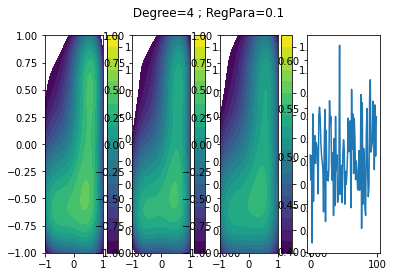

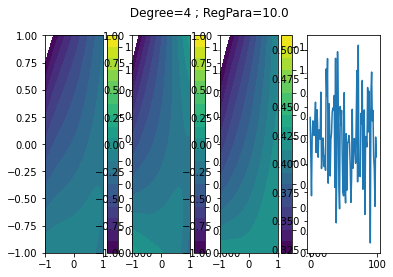

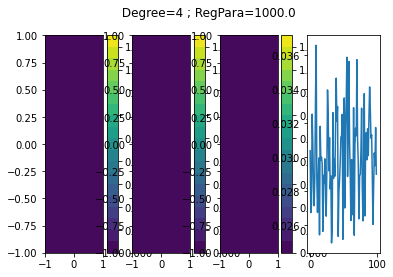

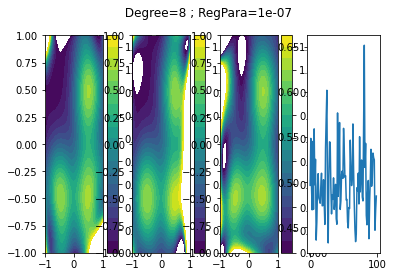

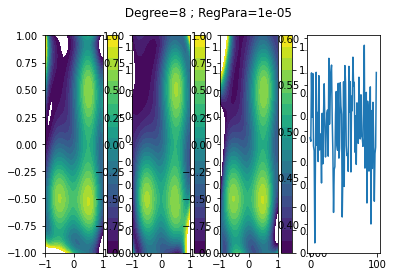

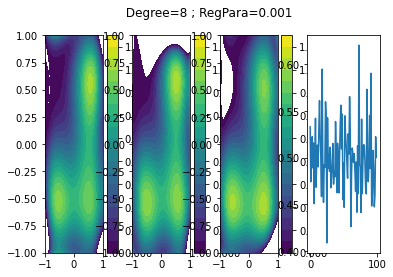

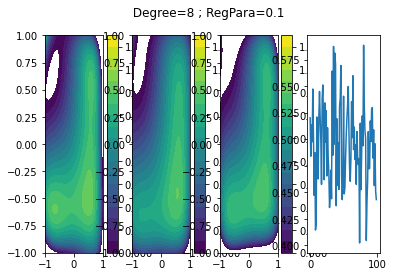

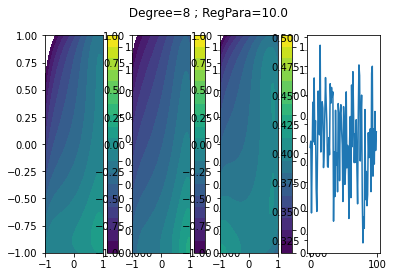

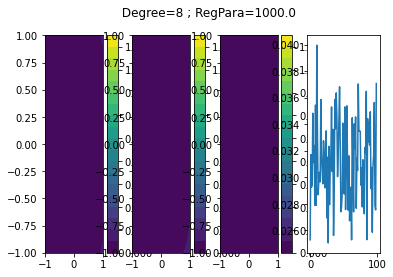

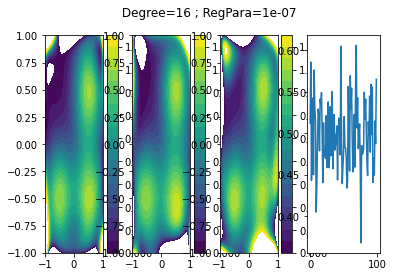

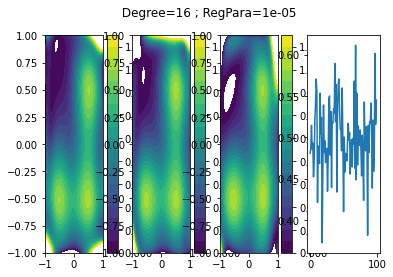

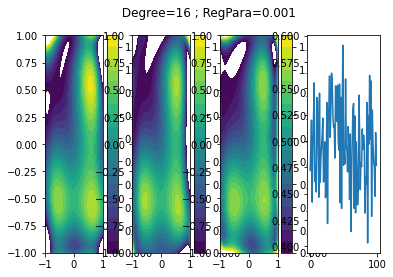

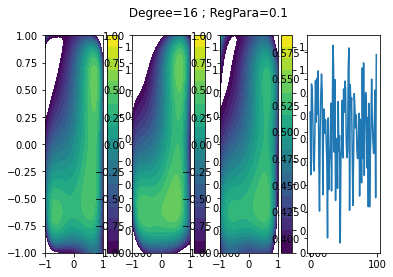

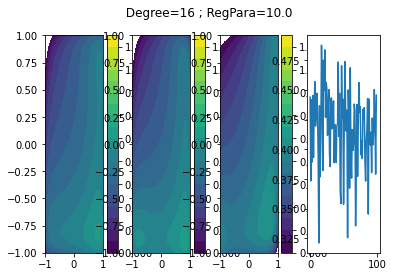

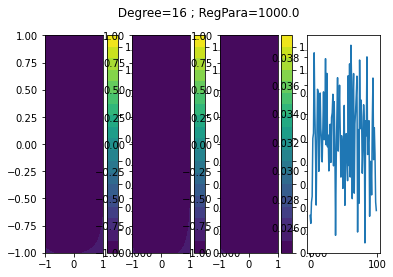

In [3]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    x_testp = polyfeat(X_test, degree)
    Y_pred = np.matmul(wt_vector.T, x_testp)
    return Y_pred

def polyfeat(X, degree = 1):
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree)
    phi = poly.fit_transform(X)
    return phi    
def actaul_Y(x):
    a = np. array([0.5,0.5])
    b = np.array([-0.5,-0.5])
    c = np.array([0.5, -0.5])
    Z = np.zeros(len(x))
    for i in range(len(x)):
        Z[i] = np.exp(-4*(np.matmul((x[i] -a).T, x[i]-a))) + np.exp(-4*(np.matmul((x[i]-b).T, x[i]-b))) + np.exp(-4*(np.matmul((x[i]-c).T, x[i]-c)))
    return Z    
def visualise_polynomial_2d(wt_vector, degree, title=" "):
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    xtp = np.concatenate((X.reshape(-1,1), Y.reshape(-1,1)), axis = 1)
    xtp_ = polyfeat(xtp, degree)
    Z = np.matmul(wt_vector.T, xtp_.T)
   
    plt.contourf(X,Y,Z.reshape(X.shape),levels=np.linspace(0.,1.2 , 20))
    plt.title(title)
    plt.colorbar()
    
    

def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    X = X_train
    Y = Y_train
    phi = polyfeat(X, degree)
   
   
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(phi.T, phi) + reg_param * np.identity(len(phi[0]))), phi.T), Y)
    return w
    

    
def  compute_BV_error_sample_plot(degree, reg_param, num_training_samples = 50):  
    for i in range(3):
        X1 = np.linspace(-1,1,10000)
        X2 = np.linspace(-1,1,10000)

        x1_train = np.random.choice(X1, size = num_training_samples)
        x2_train = np.random.choice(X1, size = num_training_samples)
        X_train = np.column_stack((x1_train, x2_train))
        Y_train = actaul_Y(X_train)
        w = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        plt.subplot(1,4, i+1)
        visualise_polynomial_2d(w, degree ,)
    exp_f = np.zeros(100)
    var = 0
    mse = 0
    bise = 0
    for i in range(100):
        x1_train = np.random.choice(X1, size = num_training_samples)
        x2_train = np.random.choice(X1, size = num_training_samples)
        X_train = np.column_stack((x1_train, x2_train))
        Y_train = actaul_Y(X_train)
        w = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        x_train_p = polyfeat(X_train, degree)
        Y_predict = np.matmul(w.T, x_train_p.T)
        exp_f[i] = Y_predict.sum()/len(Y_predict)
        var_temp = 0
        mse_temp = 0
        bise_temp  = 0
        for k in range(len(Y_predict)):
            var_temp = var_temp + (exp_f[i] - Y_predict[k])**2
            mse_temp = mse_temp + (Y_train[k]-Y_predict[k])**2
            bise_temp = bise_temp + (exp_f[i]-Y_train[k])**2
        var = var + var_temp/len(Y_predict)
        mse = mse + mse_temp/len(Y_predict)
        bise = bise + bise_temp/len(Y_predict)
    var = var/100
    mse = mse/100
    bise = bise/100
    plt.subplot(1 ,4, 4)
    plt.plot(exp_f)
    plt.suptitle(f" Degree=%d ; RegPara=%s" %(degree, reg_param))
    return bise, var,mse
    
for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
        
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        

In [199]:
# Cell type: convenience


|Variance ||1e-07||1e-05||0.001||0.1||10||1000|
|----||-----||-----||-----||-----||-----||-----|
|1|| 0.034||0.034||0.033||0.035||0.01||1.12|
|2|| 0.056||0.055||0.056||0.052||0.01||2.13|
|4|| 0.079||0.081||0.081||0.06||0.017||4.64|
|8|| 0.086||0.086||0.083||0.085||0.018||8.03|
|16|| 0.086||0.086||0.083||0.07||0.01||0|

|Bias ||1e-07||1e-05||0.001||0.1||10||1000|
|----||-----||-----||-----||-----||-----||-----|
|1|| 0.085||0.084||0.084||0.085||0.09||0.3|
|2|| 0.086||0.085||0.086||0.09||0.09||0.3|
|4|| 0.083||0.085||0.085||0.085||0.09||0.3|
|8|| 0.086||0.086||0.085||0.085||0.092||0.3|
|16|| 0.086||0.086||0.084||0.085||0.091||0.3|


#  Conclusion
- On Increasing Regulrised Parameter and keeping degree constant, Variance decreases while Bias increases (under fit)
- On Increasing degree and keeping Regulrised Parameter constant, Variance increases while Bias decreases (over fit)
- Best optimum curve will be with degree = 4 and parameter = 0.001

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




Size = 50
TrainError
[[2.50383124e-01 2.50383124e-01 2.50383124e-01 2.50383124e-01
  2.50384416e-01 2.55897830e-01]
 [1.34111598e-01 1.34111598e-01 1.34111598e-01 1.34111609e-01
  1.34213059e-01 1.97482699e-01]
 [1.02018315e-01 1.02018315e-01 1.02018315e-01 1.02019456e-01
  1.04106649e-01 1.80637925e-01]
 [1.32732739e-04 1.99157117e-04 1.07657812e-02 4.17213446e-02
  8.19909925e-02 1.63199702e-01]
 [1.95658961e-08 9.36700073e-06 1.31769315e-03 3.11130925e-02
  7.00207055e-02 1.50012860e-01]]
TestError
[[ 0.32890202  0.32890202  0.32890197  0.32889624  0.32832797  0.29661252]
 [ 0.16148596  0.16148596  0.16148577  0.16146688  0.15982731  0.21282536]
 [ 0.15931154  0.1593115   0.15930737  0.15891165  0.15592696  0.20188838]
 [31.14209444 20.83147924  2.14654975  0.3266191   0.14812675  0.20260703]
 [42.35187253 30.25817503  9.97906705  0.48778992  0.16499543  0.2075621 ]]
Size = 100
TrainError
[[2.58091013e-01 2.58091013e-01 2.58091013e-01 2.58091013e-01
  2.58091118e-01 2.58739875e-01]


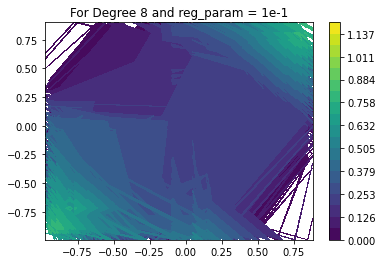

For Size = 100, Best fit curve with degree = 8 and reg_param = 1e-3


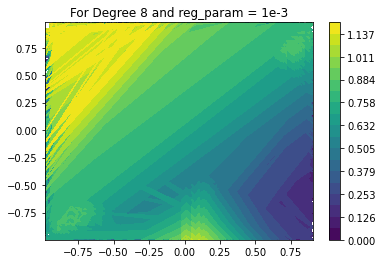

For Size = 200, Best fit curve with degree = 16 and reg_param = 1e-9


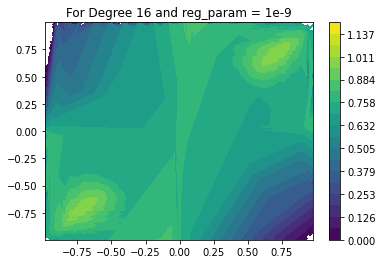

For Size = 1000, Best fit curve with degree = 16 and reg_param = 1e-9


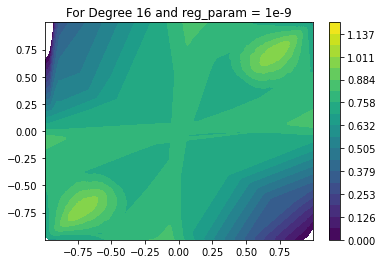

In [198]:

dataset4_1 = np.load('dataset4_1.npz')
X_train4_1 = dataset4_1['arr_0']
Y_train4_1 = dataset4_1['arr_1']
X_test4_1 = dataset4_1['arr_2']
Y_test4_1 = (dataset4_1['arr_3'])
for size in [50,100,200,1000]:
    error_train = np.zeros((5,6))
    error_test = np.empty((5,6))
    X_4 = X_train4_1[0:size]
    Y_4 = Y_train4_1[0:size]
    r = 0
    for degree in [1,2,4,8,16]:
        col = 0
        for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
            
            mse_train = 0
            mse_test = 0
            w_4 = polynomial_regression_ridge_train(X_4, Y_4, degree, reg_param)
            X_4_poly = polyfeat(X_4, degree)
            Y_4_pred = np.matmul(w_4.T, X_4_poly.T)
            for i in range(len(Y_4)):
                mse_train = mse_train + (Y_4[i] - Y_4_pred[i])**2
            mse_train = mse_train/len(Y_4)
            error_train[r][col] = mse_train
            X_test4_1_poly = polyfeat(X_test4_1[0:50], degree)
            Y_test4_1_pred = np.matmul(w_4.T, X_test4_1_poly.T)
            for i in range(len(Y_test4_1[0:50])):
                mse_test = mse_test + (Y_test4_1[i] - Y_test4_1_pred[i])**2
            mse_test = mse_test/len(Y_test4_1[0:50])
            error_test[r][col] = mse_test
            col = col + 1
        r = r+1
    print(f"Size = %d" %(size))
    print("TrainError")
    print(error_train)
    print("TestError")
    print (error_test)
    print('==================================================================')
print("For Size = 50, Best fit curve with degree = 8 and reg_param = 1e-1")
X_4_test = X_test4_1[0 :50]
X,Y = np.meshgrid(X_4_test[:,0], X_4_test[:,1])
xtp = np.concatenate((X.reshape(-1,1), Y.reshape(-1,1)), axis = 1)
xtp_ = polyfeat(xtp, 8)
Z = np.matmul(polynomial_regression_ridge_train(X_4, Y_4, 8, 1e-1).T, xtp_.T)
plt.contourf(X,Y,Z.reshape(X.shape),levels=np.linspace(0.,1.2 , 20))
plt.title("For Degree 8 and reg_param = 1e-1")
plt.colorbar()
plt.show()
print("For Size = 100, Best fit curve with degree = 8 and reg_param = 1e-3")
X_4_test = X_test4_1[0 :100]
X,Y = np.meshgrid(X_4_test[:,0], X_4_test[:,1])
xtp = np.concatenate((X.reshape(-1,1), Y.reshape(-1,1)), axis = 1)
xtp_ = polyfeat(xtp, 8)
Z = np.matmul(polynomial_regression_ridge_train(X_4, Y_4, 8, 1e-3).T, xtp_.T)
plt.contourf(X,Y,Z.reshape(X.shape),levels=np.linspace(0.,1.2 , 20))
plt.title("For Degree 8 and reg_param = 1e-3")
plt.colorbar()
plt.show()
print("For Size = 200, Best fit curve with degree = 16 and reg_param = 1e-9")
X_4_test = X_test4_1[0 :200]
X,Y = np.meshgrid(X_4_test[:,0], X_4_test[:,1])
xtp = np.concatenate((X.reshape(-1,1), Y.reshape(-1,1)), axis = 1)
xtp_ = polyfeat(xtp, 16)
Z = np.matmul(polynomial_regression_ridge_train(X_4, Y_4, 16, 1e-9).T, xtp_.T)
plt.contourf(X,Y,Z.reshape(X.shape),levels=np.linspace(0.,1.2 , 20))
plt.title("For Degree 16 and reg_param = 1e-9")
plt.colorbar()
plt.show()
print("For Size = 1000, Best fit curve with degree = 16 and reg_param = 1e-9")
X_4_test = X_test4_1[0 :1000]
X,Y = np.meshgrid(X_4_test[:,0], X_4_test[:,1])
xtp = np.concatenate((X.reshape(-1,1), Y.reshape(-1,1)), axis = 1)
xtp_ = polyfeat(xtp, 16)
Z = np.matmul(polynomial_regression_ridge_train(X_4, Y_4, 16, 1e-9).T, xtp_.T)
plt.contourf(X,Y,Z.reshape(X.shape),levels=np.linspace(0.,1.2 , 20))
plt.title("For Degree 16 and reg_param = 1e-9")
plt.colorbar()
plt.show()           



| Size = 50 TrainError ||          1e-9  ||    1e-7   ||   1e-5   ||   1e-3  ||    1e-1    ||   1e1|
|----||----||----||----||----||----||----|
|1 ||  2.503831e-01||  0.250383||  0.250383 || 0.250383 || 0.250384 || 0.255898|
|2  || 1.341116e-01 || 0.134112 || 0.134112 || 0.134112 || 0.134213 || 0.197483|
|4 ||  1.020183e-01 || 0.102018 || 0.102018 || 0.102019 || 0.104107 || 0.180638|
|8  || 1.327327e-04 || 0.000199 || 0.010766 || 0.041721 || 0.081991 || 0.163200|
|16 || 1.956590e-08 || 0.000009 || 0.001318 || 0.031113 || 0.070021 || 0.150013|

| Size = 50 TestError ||          1e-9  ||    1e-7   ||   1e-5   ||   1e-3  ||    1e-1    ||   1e1|
|----||----||----||----||----||----||----|
|1 ||   0.328902 || 0.328902  || 0.328902 || 0.328896 || 0.328328 ||  0.296613|
|2 ||  0.161486  ||  0.161486 || 0.161486 || 0.161467 || 0.159827 || 0.212825|
|4 ||   0.159312 ||  0.159311 || 0.159307 || 0.158912 || 0.155927 || 0.201888|
|8 ||  31.142094 || 20.831479 || 2.146550 || 0.326619 || 0.148127 || 0.202607|
|16|| 42.351873  || 30.258175 || 9.979067 || 0.487790 || 0.164995 || 0.207562|

| Size = 100 TrainError ||          1e-9  ||    1e-7   ||   1e-5   ||   1e-3  ||    1e-1    ||   1e1|
|----||----||----||----||----||----||----|
|1 ||  0.258091|| 0.258091 || 0.258091 || 0.258091 || 0.258091 || 0.258740|
|2 ||  0.130951|| 0.130951 || 0.130951 || 0.130951 || 0.130966 || 0.164968|
|4 ||  0.113027|| 0.113027 || 0.113027 || 0.113027 || 0.113651 || 0.152373|
|8 ||  0.041588|| 0.041588 || 0.041680 || 0.058008 || 0.092902 || 0.144886|
|16|| 0.000008 || 0.000484 || 0.007544 || 0.041729 ||  0.083697|| 0.139544|

| Size = 100 TestError||1e-9||1e-7||1e-5||1e-3||1e-1||1e1|
|----||----||----||----||----||----||----|
|1|| 0.288588 || 0.288588||  0.288588 || 0.288587||0.288474 ||0.280160|
|2 ||0.143559 || 0.143559 || 0.143559 || 0.143556||0.143219 ||0.168651|
|4 ||0.150328||  0.150328 || 0.150328 || 0.150323 ||0.150301 ||0.161494|
|8 ||0.302743 || 0.302219 || 0.259590 || 0.124643 ||0.144303 ||0.164972|
|16||6.045433||  0.970811 || 0.520181 || 0.131019 ||0.140061 ||0.168679|

| Size = 200 TrainError||1e-9||1e-7||1e-5||1e-3||1e-1||1e1|
|----||----||----||----||----||----||----|
|1  ||  0.246535 || 0.246535 || 0.246535||  0.246535 || 0.246535 || 0.246641
|2  || 0.133665 || 0.133665 ||  0.133665 || 0.133665 || 0.133669 || 0.147549
|4  || 0.113338 || 0.113338 || 0.113338 || 0.113338 || 0.113590 || 0.144444
|8  || 0.061737 || 0.061737 || 0.061738 || 0.063950 || 0.095687 || 0.141193
|16 || 0.000029 || 0.001085 || 0.011326 || 0.044463 || 0.083500 || 0.133763

| Size = 200 TestError||1e-9||1e-7||1e-5||1e-3||1e-1||1e1|
|----||----||----||----||----||----||----|
|1  || 0.282030 || 0.282030 || 0.282030 || 0.282030 || 0.281995||  0.278967
|2  || 0.140209 || 0.140209 || 0.140209 || 0.140208 || 0.140080 || 0.150318
|4  || 0.147707 || 0.147707 || 0.147706 || 0.147685 || 0.146019 || 0.153156
|8  || 0.122356 || 0.122354  ||0.122091 || 0.109683 || 0.131323 || 0.157985
|16 || 0.008475  ||0.027312  ||0.039189 || 0.070918 || 0.125629 || 0.156464

| Size = 1000 TrainError||1e-9||1e-7||1e-5||1e-3||1e-1||1e1|
|----||----||----||----||----||----||----|
|1  || 0.240728||  0.240728||  0.240728 || 0.240728 || 0.240728 || 0.240729
|2  || 0.138824 || 0.138824 || 0.138824||  0.138824 || 0.138824 || 0.139718
|4  || 0.125017 || 0.125017 || 0.125017 || 0.125017 || 0.125025||  0.134172
|8  || 0.076743 || 0.076743 || 0.076743 || 0.076846 || 0.094838 || 0.128438
|16 || 0.000025 || 0.000445 || 0.006533 || 0.038415 || 0.084993 || 0.121687

| Size = 1000 TestError||1e-9||1e-7||1e-5||1e-3||1e-1||1e1|
|----||----||----||----||----||----||----|
|1  || 0.263139 || 0.263139 || 0.263139 || 0.263139 || 0.263138 || 0.263015
|2  || 0.132550 || 0.132550 || 0.132550 || 0.132550  ||0.132543 || 0.133123
|4  || 0.134995 || 0.134995 || 0.134995 || 0.134995 || 0.135018 || 0.139105
|8  || 0.083119 || 0.083119 || 0.083116 || 0.083040 || 0.104513 || 0.136304
|16 || 0.000026 || 0.000323 || 0.006190 || 0.035497 || 0.091081 || 0.132780


- On Incresing Train data size, we decresed the test error
- Considring only test error we are getting overfit curve but also they regularised by parameter
- on incresing regularised parameter, weighted vector approches zero

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.

(You will have to analyse the posterior expression W|X,Y discussed in class, and figure out the posterior form for W.)










In [200]:
# Cell type : CodeWrite


Prior Prob. =  P(W|X)
Poserior Prob. = P(W|X,Y) = P(Y|X,Y)*P(W|X)/P(Y|X)